In [33]:
from IPython.display import HTML, display
display(HTML('''
    <div style="text-align: center; margin-bottom: 20px;">
        <img src="https://upload.wikimedia.org/wikipedia/commons/0/08/Netflix_2015_logo.svg" alt="Netflix Logo" style="height: 100px;"><br>
        <h1 style="color: #E50914; font-family: Arial Black, Gadget, sans-serif;">
            Netflix Data Analysis Project Overview
        </h1>
    </div>
'''))




###  **Project Outline**

1.  **Title**  
2.  **Introduction**  
3.  **EDA Process**  
4.  **Analysis on Dataset**

   4.1 🎭 **Content Type Distribution** (Movies vs TV Shows)  
   
   4.2 📈 **Trend of Content Added Over the Years**  
   
   4.3 🌍 **Top Countries Producing Content**  
   
   4.4 🎞️ **Most Common Genres**  
   
   4.5 ⏱️ **Distribution of Movie Durations**  
   
   4.6 🧩 **Interactive Filtering (Streamlit Dashboard)**

5. ✅ **Conclusion**

---



<h1 style="text-align: center; color: #0b3d91;">
  📊 Netflix Dataset Exploratory Data Analysis
</h1>


<div style='padding: 1.5rem; border-radius: 10px;'>
    <h2 style='color: #d62828;'>🔍 Introduction</h2>
    <p style='font-size: 16px; line-height: 1.6; color: #333;'>
        This project performs <strong>Exploratory Data Analysis (EDA)</strong> on the Netflix dataset 
        to discover patterns and trends in its content library.
    </p>
    <h3 style='color: #003049;'>🎯 Objectives</h3>
    <ul style='font-size: 15px; color: #444; line-height: 1.8;'>
        <li>Analyze the distribution of <strong>Movies vs TV Shows</strong>.</li>
        <li>Explore the trend of content added <strong>over the years</strong>.</li>
        <li>Identify <strong>top countries</strong> producing content.</li>
        <li>Find the most common <strong>genres and categories</strong>.</li>
        <li>Visualize the distribution of <strong>movie durations</strong>.</li>
        <li>Create <strong>interactive filters</strong> to explore data dynamically.</li>
    </ul>
</div>


<div style='padding: 1.5rem; box-shadow: 2px 2px 8px rgba(0,0,0,0.05);'>
    <h2 style='color: #0077b6;'>EDA Process</h2>
    <ol style='font-size: 15px; color: #333; line-height: 1.8; padding-left: 1.2rem;'>
        <li><strong>Load and clean</strong> the Netflix dataset</li>
        <li><strong>Handle missing values</strong> to ensure clean analysis</li>
        <li><strong>Extract meaningful features</strong> like year, genres, country, and duration</li>
        <li><strong>Analyze and visualize</strong> the data to uncover trends and insights</li>
    </ol>
</div>


## 1. Importing Libraries


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## Loading the Dataset



In [37]:

file_path = r"C:\Users\mayan\Downloads\netflix_titles.csv"  # Adjust the path as needed
df = pd.read_csv(file_path)
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


##  Initial Data Exploration
###  Dataset Overview

In [6]:
# Shape of the dataset
print("Shape of dataset:", df.shape)

# Data Types of each column
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Shape of dataset: (8807, 12)

Data Types:
 show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Missing Values:
 show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


# Handling missing values

In [34]:
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Not Available')
df['date_added'] = df['date_added'].fillna('Not Available')
df['rating'] = df['rating'].fillna('Not Rated')
df['duration'] = df['duration'].fillna('Not Available')


##  Converting Data Types

In [35]:

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month


<div style="text-align: center;">
    <h1>Analysis on dataset</h1>
</div>


# 3.1  Distribution of Content Types (Movies vs TV Shows)




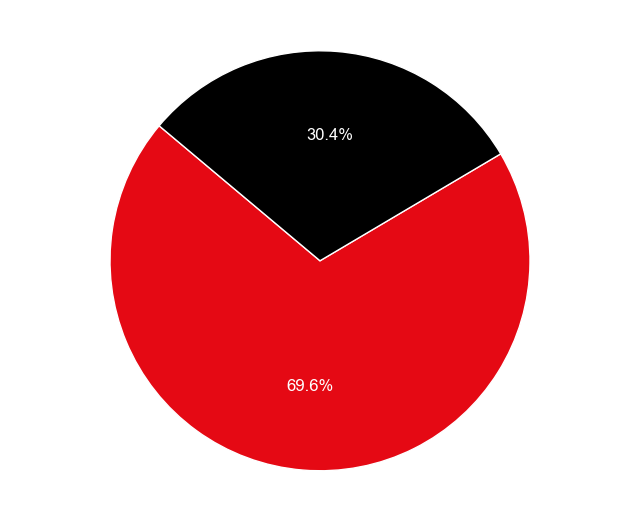

In [49]:
# Count of each content type
content_type_counts = df['type'].value_counts()

# Define custom colors: Netflix dark red and black
netflix_colors = ['#E50914', '#000000']  # Dark red for 'Movie', black for 'TV Show'

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(
    content_type_counts,
    labels=content_type_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=netflix_colors,
    textprops={'color': 'white'}  # White text for better contrast on dark colors
)
plt.title('Distribution of Content Types on Netflix', color='white')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.gca().set_facecolor('#1A1A1A')  # Optional: Set background to dark gray
plt.show()


#### Analysis:
Netflix's content library is dominated by Movies, which significantly outnumber TV Shows. This suggests that Netflix focuses more on providing standalone films than episodic content, likely to cater to quicker consumption preferences.



# 3.2 Trend of Content Added Over the Years

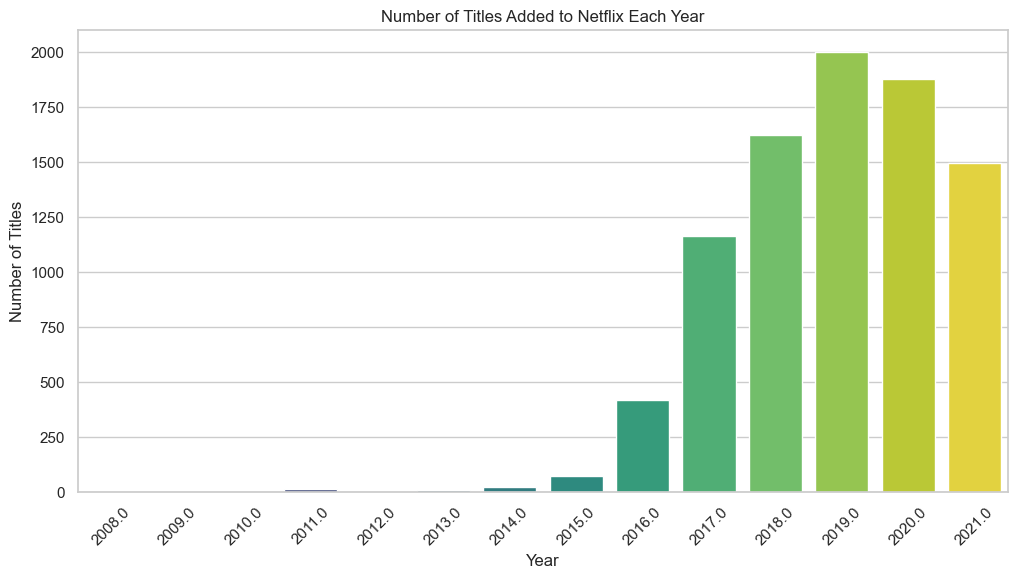

In [47]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(
    data=titles_per_year_df,
    x='year',
    y='count',
    hue='year',             # Assign hue to match x
    palette='viridis',
    legend=False            # Hide the redundant legend
)
plt.title('Number of Titles Added to Netflix Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


#### Analysis:
The number of titles added to Netflix peaked around 2018–2020, indicating a period of aggressive content expansion. Post-2020, the trend shows a slight decline, possibly due to market saturation or the impact of the global pandemic on content production.



# 3.3. Top 10 Countries by Content Production


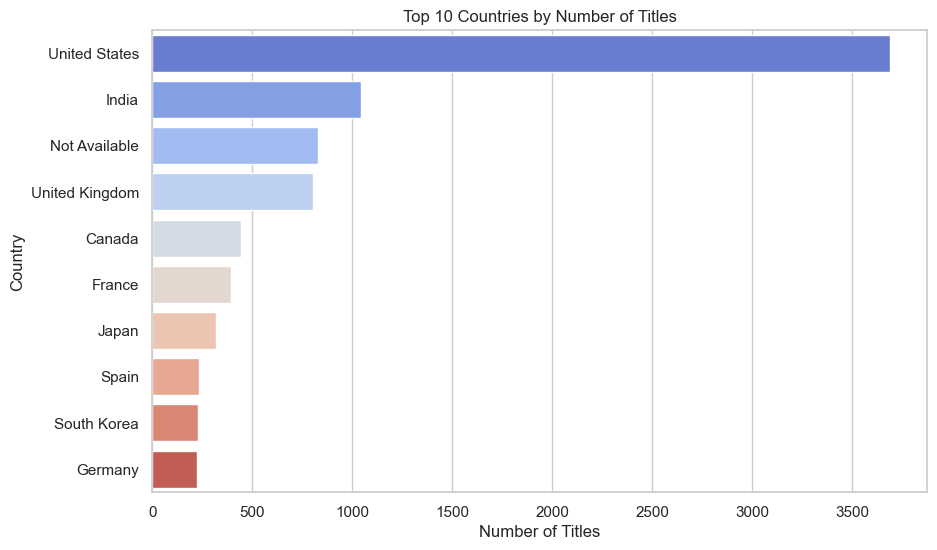

In [15]:
# Splitting multiple countries and counting individually
country_counts = df['country'].dropna().str.split(', ').explode().value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_counts.values,
    y=country_counts.index,
    hue=country_counts.index,        # Added this
    palette='coolwarm',
    legend=False                     # Suppresses extra legend
)
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()



#### Analysis:
The United States leads by a large margin in content production, followed by countries like India, United Kingdom, and Canada. This reflects Netflix’s strong presence in English-speaking markets, along with strategic investments in regional content like Bollywood and UK originals.

# 3.4. Most Common Genres

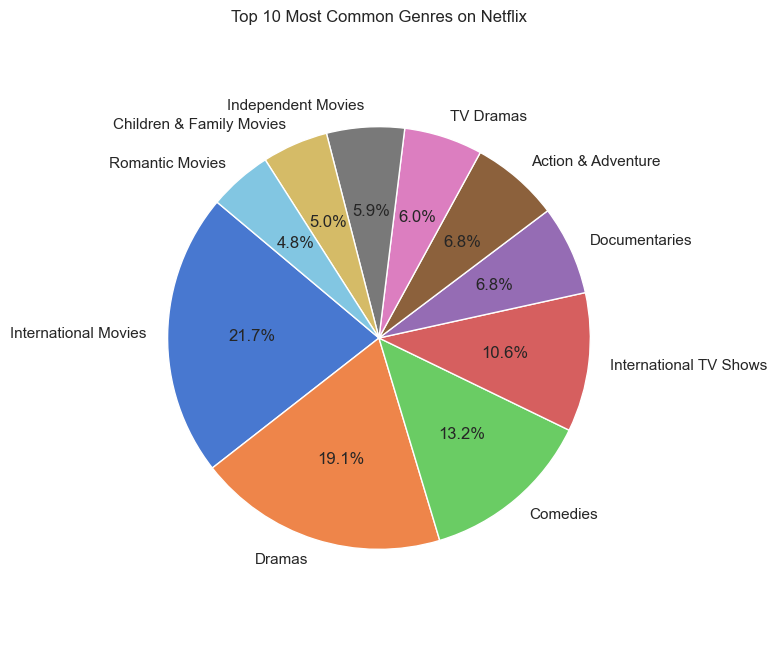

In [52]:
# Splitting multiple genres and counting individually
genre_counts = df['listed_in'].str.split(', ').explode().value_counts().head(10)

# Plotting
plt.figure(figsize=(6, 8))
plt.pie(
    genre_counts.values,
    labels=genre_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('muted')
)
plt.title('Top 10 Most Common Genres on Netflix')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()


#### Analysis:
The most frequent genres on Netflix include Dramas, Comedies, and Documentaries, showcasing a balance between entertainment and informative storytelling. The prominence of Drama indicates user interest in emotionally engaging narratives across both Movies and TV Shows.



# 3.5 Distribution of Content Ratings



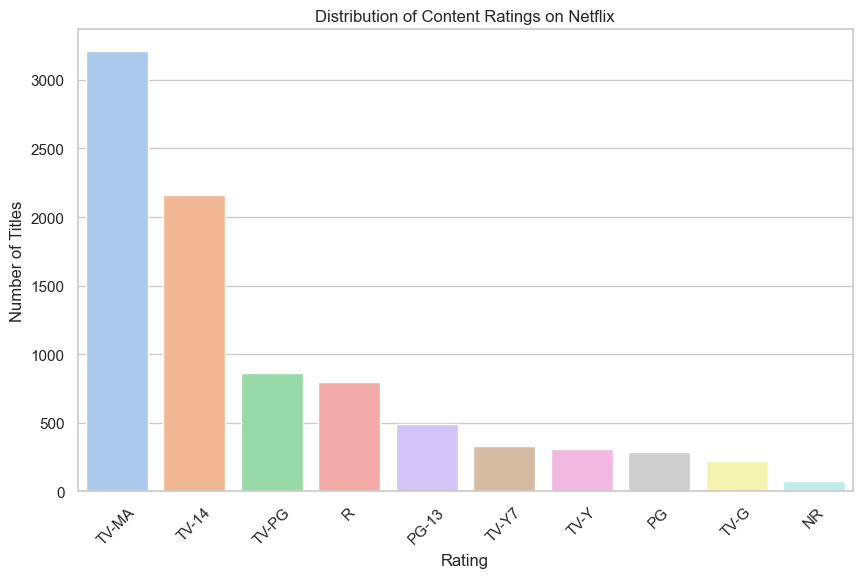

In [50]:
# Count of each rating
rating_counts = df['rating'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    x=rating_counts.index,
    y=rating_counts.values,
    hue=rating_counts.index,     # Hue same as x to match colors
    palette='pastel',
    legend=False
)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()


#### Analysis:
The bar plot shows that TV-MA (Mature Audience) is the most prevalent content rating on Netflix, followed by TV-14 and TV-PG, indicating that a significant portion of content is targeted toward older teens and adults. The limited amount of G and TV-Y rated content suggests that Netflix has a smaller catalog aimed at very young children or general audiences, highlighting its focus on more mature or teen-oriented programming.

# 3.6 Duration Analysis for Movies

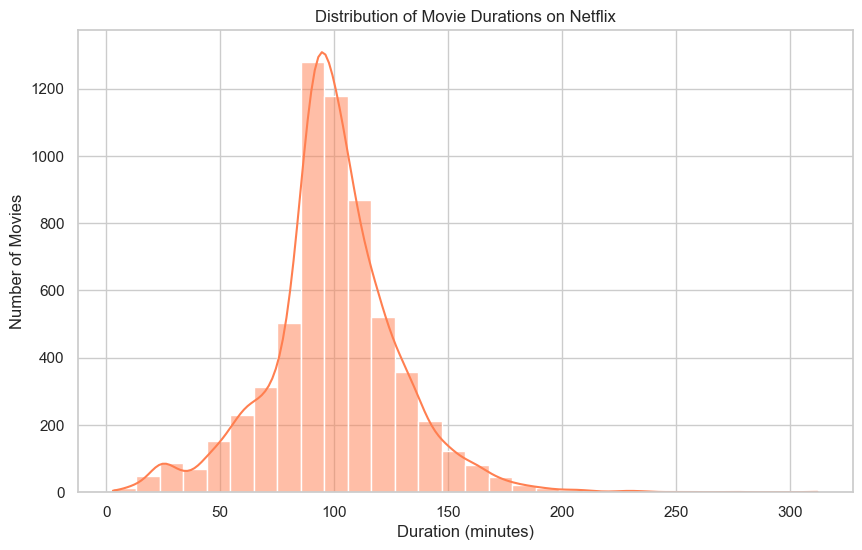

In [22]:
# Filter only movies
movies_df = df[df['type'] == 'Movie'].copy()

# Remove rows with non-numeric durations (like 'Not Available')
movies_df = movies_df[movies_df['duration'].str.contains('min', na=False)]

# Extract duration in minutes
movies_df['duration'] = movies_df['duration'].str.replace(' min', '', regex=False).astype(float)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_df, x='duration', bins=30, kde=True, color='coral')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()


#### Analysis:
The histogram reveals that the majority of Netflix movies have a duration between 80 to 120 minutes, reflecting the typical length of feature films. The presence of a normal distribution with few outliers suggests that Netflix favors content with standard runtimes that align with viewer expectations for pacing and engagement.

